In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# reconstruct thumbnail volume

stack = 'MD589'

downsample_factor = 32

section_thickness = 20 # in um
xy_pixel_distance_lossless = 0.46
xy_pixel_distance_tb = xy_pixel_distance_lossless * 32 # in um, thumbnail
# factor = section_thickness/xy_pixel_distance_lossless

xy_pixel_distance_downsampled = xy_pixel_distance_lossless * downsample_factor
z_xy_ratio_downsampled = section_thickness / xy_pixel_distance_downsampled

n_sec = {'MD589': 445, 'MD594': 432}

dm = DataManager(stack=stack)

# volume = np.zeros((dm.image_height/downsample_factor, 
#                    dm.image_width/downsample_factor, 
#                    int(n_sec[stack]*z_xy_ratio_downsampled)), np.uint8)

volume = np.zeros((1500, 2000, int(n_sec[stack]*z_xy_ratio_downsampled)), np.uint8)

section_bs_begin, section_bs_end = section_range_lookup[stack]
print section_bs_begin, section_bs_end

for sec in range(section_bs_begin, section_bs_end+1):
    
    print sec
    
#     dm.set_slice(section=sec)

#     im = img_as_ubyte(rgb2gray(imread(os.environ['DATA_DIR'] + '/%(stack)s_thumbnail_aligned_cropped/%(stack)s_%(slice)04d_thumbnail_aligned_cropped.tif' \
#                         % {'stack': stack, 'slice': sec})))

    im = img_as_ubyte(imread(os.environ['DATA_DIR'] + '/%(stack)s_thumbnail_aligned_masked/%(stack)s_%(slice)04d_thumbnail_aligned_masked.png' \
        % {'stack': stack, 'slice': sec})) 
    
    volume[:,:, int(z_xy_ratio_downsampled*sec):int(z_xy_ratio_downsampled*(sec+1))] = im[..., np.newaxis]

In [ ]:
volume.shape

In [ ]:
# volume_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_volumes'

volume[volume < 1e-6] = 0
xs, ys, zs = np.where(volume > 0)

xmin = xs.min()
xmax = xs.max()
ymin = ys.min()
ymax = ys.max()
zmin = zs.min()
zmax = zs.max()

print xmin, xmax
print ymin, ymax
print zmin, zmax

In [ ]:
volume = volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1]

In [ ]:
dm = DataManager(stack=stack)

theta_z = 0
theta_y = 0
theta_x = 0
tx = 0
ty = 0
tz = 0
skew_z = 0
skew_y = 0
skew_x = 0

# cos_z = np.cos(theta_z)
# sin_z = np.sin(theta_z)
# cos_y = np.cos(theta_y)
# sin_y = np.sin(theta_y)
# Rz = np.array([[cos_z, -sin_z, 0], [sin_z, cos_z, 0], [0,0,1]])
# Ry = np.array([[cos_y, 0, -sin_y], [0, 1, 0], [sin_y, 0, cos_y]])
# Rx = np.array([[1, 0, 0], [0, cos_y, -sin_y], [0, sin_y, cos_y]])
# R = np.dot(Rz, Ry, Rx)


In [ ]:
xs, ys, zs = np.meshgrid(range(volume.shape[0]), 
                         range(volume.shape[1]), 
                         range(volume.shape[2]))

In [ ]:
xys = np.c_[xs.flat, ys.flat, zs.flat]

In [ ]:
# manual affine correction
T = np.eye(3)
T[0,2] = .1 # + move right side down
T[2,0] = -.1 # + move bottom side left
# T[2,0] = .1

print T

In [ ]:
xyzs_new = np.dot(T, np.c_[xs.flat, ys.flat, zs.flat].T).astype(np.int).T

In [ ]:
valid = (xyzs_new[:,0] >= 0) & (xyzs_new[:,1] >= 0) & (xyzs_new[:,2] >= 0) &\
(xyzs_new[:,0] < volume.shape[0]) & (xyzs_new[:,1] < volume.shape[1]) & (xyzs_new[:,2] < volume.shape[2])

In [ ]:
# volume_new = np.zeros((dm.image_height/downsample_factor, 
#                    dm.image_width/downsample_factor, 
#                    int(n_sec[stack]*z_xy_ratio_downsampled)), np.uint8)

volume_new = np.zeros_like(volume, np.uint8)

volume_new[xyzs_new[valid, 0], xyzs_new[valid, 1], xyzs_new[valid, 2]] = \
volume[xys[valid, 0], xys[valid, 1], xys[valid, 2]]

In [ ]:
for y in range(0, volume.shape[1], 50):
    plt.imshow(volume_new[:, y, :], cmap=plt.cm.gray);
    plt.title('y = %d' % y);
    plt.show();

In [ ]:
for y in range(0, volume.shape[1], 10):
    plt.imshow(volume[:, y, :], cmap=plt.cm.gray);
    plt.title('y = %d' % y);
    plt.show();

In [ ]:
# reconstruct labelmap volume

In [3]:
downsample_factor = 8

section_thickness = 20 # in um
xy_pixel_distance_lossless = 0.46
xy_pixel_distance_tb = xy_pixel_distance_lossless * 32 # in um, thumbnail
# factor = section_thickness/xy_pixel_distance_lossless

xy_pixel_distance_downsampled = xy_pixel_distance_lossless * downsample_factor
z_xy_ratio_downsampled = section_thickness / xy_pixel_distance_downsampled

stack = 'MD589'

n_sec = {'MD589': 445, 'MD594': 432}
    
# build annotation volume
section_bs_begin, section_bs_end = section_range_lookup[stack]
print section_bs_begin, section_bs_end

93 368


In [25]:
dm = DataManager(stack=stack)

volume = np.zeros((dm.image_height/downsample_factor, 
                   dm.image_width/downsample_factor, 
                   int(n_sec[stack]*z_xy_ratio_downsampled)), np.int8)

print volume.shape

for sec in range(section_bs_begin, section_bs_end+1):
    
    # only 9 class
#     fn = '/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/%(stack)s/%(stack)s_%(slice)04d_labelMapLossless.npz' % \
#         {'stack': stack, 'slice': sec}
    # or, all classes
    fn = '/oasis/projects/nsf/csd395/yuncong/CSHL_labelMapsLossless/%(stack)s/%(stack)s_%(slice)04d_labelMapLossless_AllClasses.npz' % \
        {'stack': stack, 'slice': sec}
        
    if os.path.exists(fn):
        print sec
        label_map = np.load(fn)['arr_0'][::downsample_factor, ::downsample_factor]
        volume[:, :, int(z_xy_ratio_downsampled*sec):int(z_xy_ratio_downsampled*(sec+1))] = label_map[..., np.newaxis]

    # np.savez_compressed(os.path.join(volume_dir, 'volume_'+stack+'_labelmap'), volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])
    # np.savez_compressed(os.path.join(volume_dir, 'volume_'+stack+'_predMap'), volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])
#     np.savez_compressed(os.path.join(volume_dir, 'volume_%(stack)s_scoreMap_%(label)d' % {'stack': stack, 'label': l}),
#                         volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])

(1468, 1676, 2418)
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199


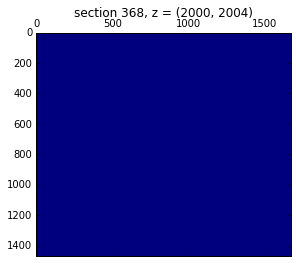

In [24]:
# for sec in range(section_bs_begin, section_bs_end+1):
sec = 368
plt.matshow(volume[..., int(sec*z_xy_ratio_downsampled)]);
plt.title('section %d, z = (%d, %d)'%(sec, int(sec*z_xy_ratio_downsampled), 
                                     int(z_xy_ratio_downsampled*(sec+1))-1));
plt.show();

In [ ]:
xs, ys, zs = np.where(volume != 0)

xmin = xs.min()
xmax = xs.max()
ymin = ys.min()
ymax = ys.max()
zmin = zs.min()
zmax = zs.max()

print xmin, xmax
print ymin, ymax
print zmin, zmax

reduced_height = xmax+1-xmin
reduced_width = ymax+1-ymin
reduced_depth = zmax+1-zmin
print reduced_height, reduced_width, reduced_depth

In [ ]:
reduced_height = xmax+1-xmin
reduced_width = ymax+1-ymin
reduced_depth = zmax+1-zmin
print reduced_height, reduced_width, reduced_depth

In [ ]:
np.savez_compressed(os.path.join(volume_dir, 'volume_%(stack)s_scoreMap_%(label)d' % {'stack': stack, 'label': l}),
                    volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])

In [ ]:
# reconstruct score volume

In [ ]:
patch_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_data_patches/'

In [ ]:
stack = 'MD594'

if stack == 'MD589':
    section_roi_begin, section_roi_end = (154, 168)
elif stack == 'MD594':
    section_roi_begin, section_roi_end = (157, 166)

In [ ]:
labels = ['BackG', '5N', '7n', '7N', '12N', 'Gr', 'LVe', 'Pn', 'SuVe', 'VLL']
label_dict = dict([(l,i) for i, l in enumerate(labels)])

# colors = (np.loadtxt(os.environ['REPO_DIR'] + '/visualization/100colors.txt')*255).astype(np.uint8)
# colors[label_dict['BackG']] = 255

In [ ]:
dm = DataManager(stack=stack)

In [ ]:
for l in range(1, 10):
# for l in [1]:
    
    volume = np.zeros((dm.image_height/downsample_factor, 
                       dm.image_width/downsample_factor, 
                       int(n_sec[stack]*z_xy_ratio_downsampled)), np.float16)
    print volume.shape

    for sec in range(section_roi_begin, section_roi_end+1):        
        print sec
        score_map = np.load(patch_dir + '/%(stack)s_roi1_denseScoreMapsLossless/%(stack)s_%(slice)04d_roi1_denseScoreMapLossless_%(label)d.npz' \
            % {'stack': stack, 'slice': sec, 'label': l})['arr_0'][::downsample_factor, ::downsample_factor]
        volume[:, :, int(sec*z_xy_ratio_downsampled):int((sec+1)*z_xy_ratio_downsampled)] = score_map[..., np.newaxis].copy()

        # np.savez_compressed(os.path.join(volume_dir, 'volume_'+stack+'_labelmap'), volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])
        # np.savez_compressed(os.path.join(volume_dir, 'volume_'+stack+'_predMap'), volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])
#         np.savez_compressed(os.path.join(volume_dir, 'volume_%(stack)s_scoreMap_%(label)d' % {'stack': stack, 'label': l}),
#                             volume[xmin:xmax+1, ymin:ymax+1, zmin:zmax+1])

In [ ]:
volume[volume < 1e-4] = 0

In [ ]:
xs, ys, zs = np.where(volume > 0)

xmin = xs.min()
xmax = xs.max()
ymin = ys.min()
ymax = ys.max()
zmin = zs.min()
zmax = zs.max()

print xmin, xmax
print ymin, ymax
print zmin, zmax

In [ ]:
# reconstruct outer contour

In [ ]:
from skimage.measure import find_contours

stack = 'MD589'

dm = DataManager(stack=stack)
volume = np.zeros((dm.image_height/downsample_factor, 
                   dm.image_width/downsample_factor, 
                   int(n_sec[stack]*z_xy_ratio_downsampled)), np.bool)

for sec in range(section_bs_begin, section_bs_end+1):
    
    print sec
    
    dm.set_slice(sec)
    
#     dm = DataManager(stack=stack, section=sec)
    m = dm.load_thumbnail_mask()

    m[0,:] = 0
    m[-1,:] = 0
    m[:,0] = 0
    m[:,-1] = 0

    m_padded = np.pad(m, ((5,5),(5,5)), mode='constant', constant_values=0)
    
    cnts = find_contours(m_padded, .5)
    cnts = [cnt.astype(np.int) - (5,5) for cnt in cnts if len(cnt) > 300]
    yxs = np.array([(y,x) for y,x in cnts[0] if y > 1 and x > 1]).astype(np.int)
    
    b = np.ascontiguousarray(yxs).view(np.dtype((np.void, yxs.dtype.itemsize * yxs.shape[1])))
    _, idx = np.unique(b, return_index=True)

    yxs = yxs[idx] # in thumbnail frame
    
    volume[yxs[:,0]*32/downsample_factor, yxs[:,1]*32/downsample_factor, 
           int(z_xy_ratio_downsampled*sec):int(z_xy_ratio_downsampled*(sec+1))] = 1
    
#     if len(cnts) > 1:
#         print map(len, cnts)
#         print cnts
#         plt.figure(figsize=(10,10));
#         plt.imshow(m);
#         plt.show();
#         break

#     contour_points_atlas[sec] = yxs[np.arange(0, yxs.shape[0], 10)]
    

In [ ]:
plt.figure(figsize=(20,20));
plt.imshow(volume[:, 1400, :], cmap=plt.cm.gray);
plt.show();

In [ ]:
for sec in range(section_bs_begin, section_bs_end+1):
#     plt.figure(figsize=(20,20));
    plt.imshow(volume[..., int(sec*z_xy_ratio_downsampled)], cmap=plt.cm.gray);
    plt.title('section %d, z = (%d, %d)'%(sec, int(sec*z_xy_ratio_downsampled), 
                                         int(z_xy_ratio_downsampled*(sec+1))-1));
    plt.show();

In [ ]:
volume_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_volumes/'
if not os.path.exists(volume_dir):
    os.makedirs(volume_dir)

In [ ]:
np.savez_compressed(os.path.join(volume_dir, 'volume_%(stack)s_contour' % {'stack': stack}),
                    volume)